<a href="https://colab.research.google.com/github/srihith95/f1_data-analysis/blob/main/F1_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.6/122.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.2 MB/s eta 0:00:00


## Setting up

In [2]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection


In [3]:
# Load the session and its laps
session = ff1.get_session(2022, 'Zandvoort', 'Q')
session.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB

DEFAULT CACHE ENABLED!
	Cache directory: /root/.cache/fastf1.
	Size: 24.0 KB
core           INFO 	Loading data for Dutch Grand Prix - Qualifying [v3.1.6]
INFO:fastf1.fastf1.core:Loading data for Dutch Grand Prix - Qualifying [v3.1.6]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fast

## Exploring the data

In [4]:
session.car_data

{'1':                          Date  RPM  Speed  nGear  Throttle  Brake  DRS Source  \
 0     2022-09-03 12:45:03.231    0      0      0         0  False    0    car   
 1     2022-09-03 12:45:03.631    0      0      0         0  False    0    car   
 2     2022-09-03 12:45:03.791    0      0      0         0  False    0    car   
 3     2022-09-03 12:45:04.071    0      0      0         0  False    0    car   
 4     2022-09-03 12:45:04.511    0      0      0         0  False    0    car   
 ...                       ...  ...    ...    ...       ...    ...  ...    ...   
 18906 2022-09-03 14:09:04.326    0      0      0       104   True    8    car   
 18907 2022-09-03 14:09:04.606    0      0      0       104   True    8    car   
 18908 2022-09-03 14:09:04.806    0      0      0       104   True    8    car   
 18909 2022-09-03 14:09:04.966    0      0      0       104   True    8    car   
 18910 2022-09-03 14:09:05.367    0      0      0       104   True    8    car   
 
         

In [5]:
session.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:21:09.642000,VER,1,NaT,1.0,1.0,0 days 00:19:46.866000,NaT,NaT,0 days 00:00:30.588000,...,True,Red Bull Racing,0 days 00:19:46.866000,2022-09-03 13:04:46.876,1,NaN,False,,False,False
1,0 days 00:22:20.959000,VER,1,0 days 00:01:11.317000,2.0,1.0,NaT,NaT,0 days 00:00:24.455000,0 days 00:00:24.776000,...,True,Red Bull Racing,0 days 00:21:09.642000,2022-09-03 13:06:09.652,1,NaN,False,,False,True
2,0 days 00:24:07.220000,VER,1,0 days 00:01:46.261000,3.0,1.0,NaT,0 days 00:24:03.490000,0 days 00:00:34.813000,0 days 00:00:37.411000,...,True,Red Bull Racing,0 days 00:22:20.959000,2022-09-03 13:07:20.969,1,NaN,False,,False,False
3,0 days 00:48:49.924000,VER,1,NaT,4.0,2.0,0 days 00:47:27.401000,NaT,NaT,0 days 00:00:29.760000,...,False,Red Bull Racing,0 days 00:47:27.401000,2022-09-03 13:32:27.411,1,NaN,False,,False,False
4,0 days 00:50:00.851000,VER,1,0 days 00:01:10.927000,5.0,2.0,NaT,NaT,0 days 00:00:24.529000,0 days 00:00:24.644000,...,False,Red Bull Racing,0 days 00:48:49.924000,2022-09-03 13:33:49.934,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0 days 00:17:38.487000,LAT,6,NaT,1.0,1.0,0 days 00:16:03.595000,NaT,NaT,0 days 00:00:31.119000,...,True,Williams,0 days 00:16:03.595000,2022-09-03 13:01:03.605,1,NaN,False,,False,False
275,0 days 00:18:51.840000,LAT,6,0 days 00:01:13.353000,2.0,1.0,NaT,NaT,0 days 00:00:25.080000,0 days 00:00:25.871000,...,True,Williams,0 days 00:17:38.487000,2022-09-03 13:02:38.497,1,NaN,False,,False,True
276,0 days 00:20:32.590000,LAT,6,0 days 00:01:40.750000,3.0,1.0,NaT,0 days 00:20:31.017000,0 days 00:00:32.807000,0 days 00:00:33.179000,...,True,Williams,0 days 00:18:51.840000,2022-09-03 13:03:51.850,1,NaN,False,,False,False
277,0 days 00:31:32.716000,LAT,6,NaT,4.0,2.0,0 days 00:29:56.836000,NaT,NaT,0 days 00:00:30.243000,...,True,Williams,0 days 00:20:32.590000,2022-09-03 13:05:32.600,1,NaN,False,,False,False


In [6]:
# Finding laps of a specific driver
laps_lat = session.laps.pick_driver('LAT')
laps_lat

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
274,0 days 00:17:38.487000,LAT,6,NaT,1.0,1.0,0 days 00:16:03.595000,NaT,NaT,0 days 00:00:31.119000,...,True,Williams,0 days 00:16:03.595000,2022-09-03 13:01:03.605,1,NaN,False,,False,False
275,0 days 00:18:51.840000,LAT,6,0 days 00:01:13.353000,2.0,1.0,NaT,NaT,0 days 00:00:25.080000,0 days 00:00:25.871000,...,True,Williams,0 days 00:17:38.487000,2022-09-03 13:02:38.497,1,NaN,False,,False,True
276,0 days 00:20:32.590000,LAT,6,0 days 00:01:40.750000,3.0,1.0,NaT,0 days 00:20:31.017000,0 days 00:00:32.807000,0 days 00:00:33.179000,...,True,Williams,0 days 00:18:51.840000,2022-09-03 13:03:51.850,1,NaN,False,,False,False
277,0 days 00:31:32.716000,LAT,6,NaT,4.0,2.0,0 days 00:29:56.836000,NaT,NaT,0 days 00:00:30.243000,...,True,Williams,0 days 00:20:32.590000,2022-09-03 13:05:32.600,1,NaN,False,,False,False
278,0 days 00:33:27.814000,LAT,6,0 days 00:01:55.098000,5.0,2.0,NaT,0 days 00:33:23.464000,0 days 00:00:24.653000,0 days 00:00:46.173000,...,True,Williams,0 days 00:31:32.716000,2022-09-03 13:16:32.726,1,NaN,False,,False,False


In [7]:
# Finding fastest lap of a driver
laps_lat.pick_fastest()

Time                      0 days 00:18:51.840000
Driver                                       LAT
DriverNumber                                   6
LapTime                   0 days 00:01:13.353000
LapNumber                                    2.0
Stint                                        1.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:25.080000
Sector2Time               0 days 00:00:25.871000
Sector3Time               0 days 00:00:22.402000
Sector1SessionTime        0 days 00:18:03.567000
Sector2SessionTime        0 days 00:18:29.438000
Sector3SessionTime        0 days 00:18:51.840000
SpeedI1                                    279.0
SpeedI2                                    283.0
SpeedFL                                    311.0
SpeedST                                    321.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [8]:
laps_lat.pick_fastest().get_telemetry()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-09-03 13:02:38.497,0 days 00:17:38.487000,,407.412500,0 days 00:00:00,11536,313,8,100,False,12,interpolation,0.107189,0.000025,OnTrack,493,3744,535
3,2022-09-03 13:02:38.514,0 days 00:17:38.504000,,407.412500,0 days 00:00:00.017000,11550,314,8,100,False,12,car,1.589167,0.000375,OnTrack,499,3758,536
4,2022-09-03 13:02:38.567,0 days 00:17:38.557000,,407.412500,0 days 00:00:00.070000,11552,314,8,100,False,12,pos,6.209185,0.001465,OnTrack,518,3804,537
5,2022-09-03 13:02:38.674,0 days 00:17:38.664000,23,407.412500,0 days 00:00:00.177000,11554,314,8,100,False,12,car,15.544722,0.003667,OnTrack,560,3908,537
6,2022-09-03 13:02:38.927,0 days 00:17:38.917000,23,401.145833,0 days 00:00:00.430000,11596,315,8,100,False,12,pos,37.741692,0.008902,OnTrack,665,4161,537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2022-09-03 13:03:51.567,0 days 00:18:51.557000,23,400.437500,0 days 00:01:13.070000,11462,310,8,100,False,12,pos,4202.384375,0.991227,OnTrack,405,3520,537
571,2022-09-03 13:03:51.635,0 days 00:18:51.625000,23,391.127500,0 days 00:01:13.138000,11490,311,8,100,False,12,car,4208.267500,0.992615,OnTrack,426,3576,537
572,2022-09-03 13:03:51.727,0 days 00:18:51.717000,23,386.038611,0 days 00:01:13.230000,11504,311,8,100,False,12,pos,4216.233690,0.994494,OnTrack,456,3650,537
573,2022-09-03 13:03:51.795,0 days 00:18:51.785000,23,380.949722,0 days 00:01:13.298000,11519,312,8,100,False,12,car,4222.134167,0.995885,OnTrack,477,3704,536


# Building the plots

In [9]:
# Specify the drivers we want to compare
driver_1, driver_2 = 'LEC', 'HAM'

In [10]:
# Find the laps
laps_driver_1 = session.laps.pick_driver(driver_1)
laps_driver_2 = session.laps.pick_driver(driver_2)

fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

telemetry_driver_1 = fastest_driver_1.get_telemetry()
telemetry_driver_2 = fastest_driver_2.get_telemetry()

https://theoehrly.github.io/Fast-F1/utils.html

In [11]:
# Get the gap (delta time) between driver 1 and driver 2
delta_time, ref_tel, compare_tel = ff1.utils.delta_time(fastest_driver_1, fastest_driver_2)

/usr/local/lib/python3.10/dist-packages/fastf1/utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


In [12]:
# Identify team colors
team_driver_1 = laps_driver_1['Team'].iloc[0]
team_driver_2 = laps_driver_2['Team'].iloc[0]

# Fastf1 has a built-in function for the team colors!
color_1 = ff1.plotting.team_color(team_driver_1)
color_2 = ff1.plotting.team_color(team_driver_2)

### Telemetry of both the drivers

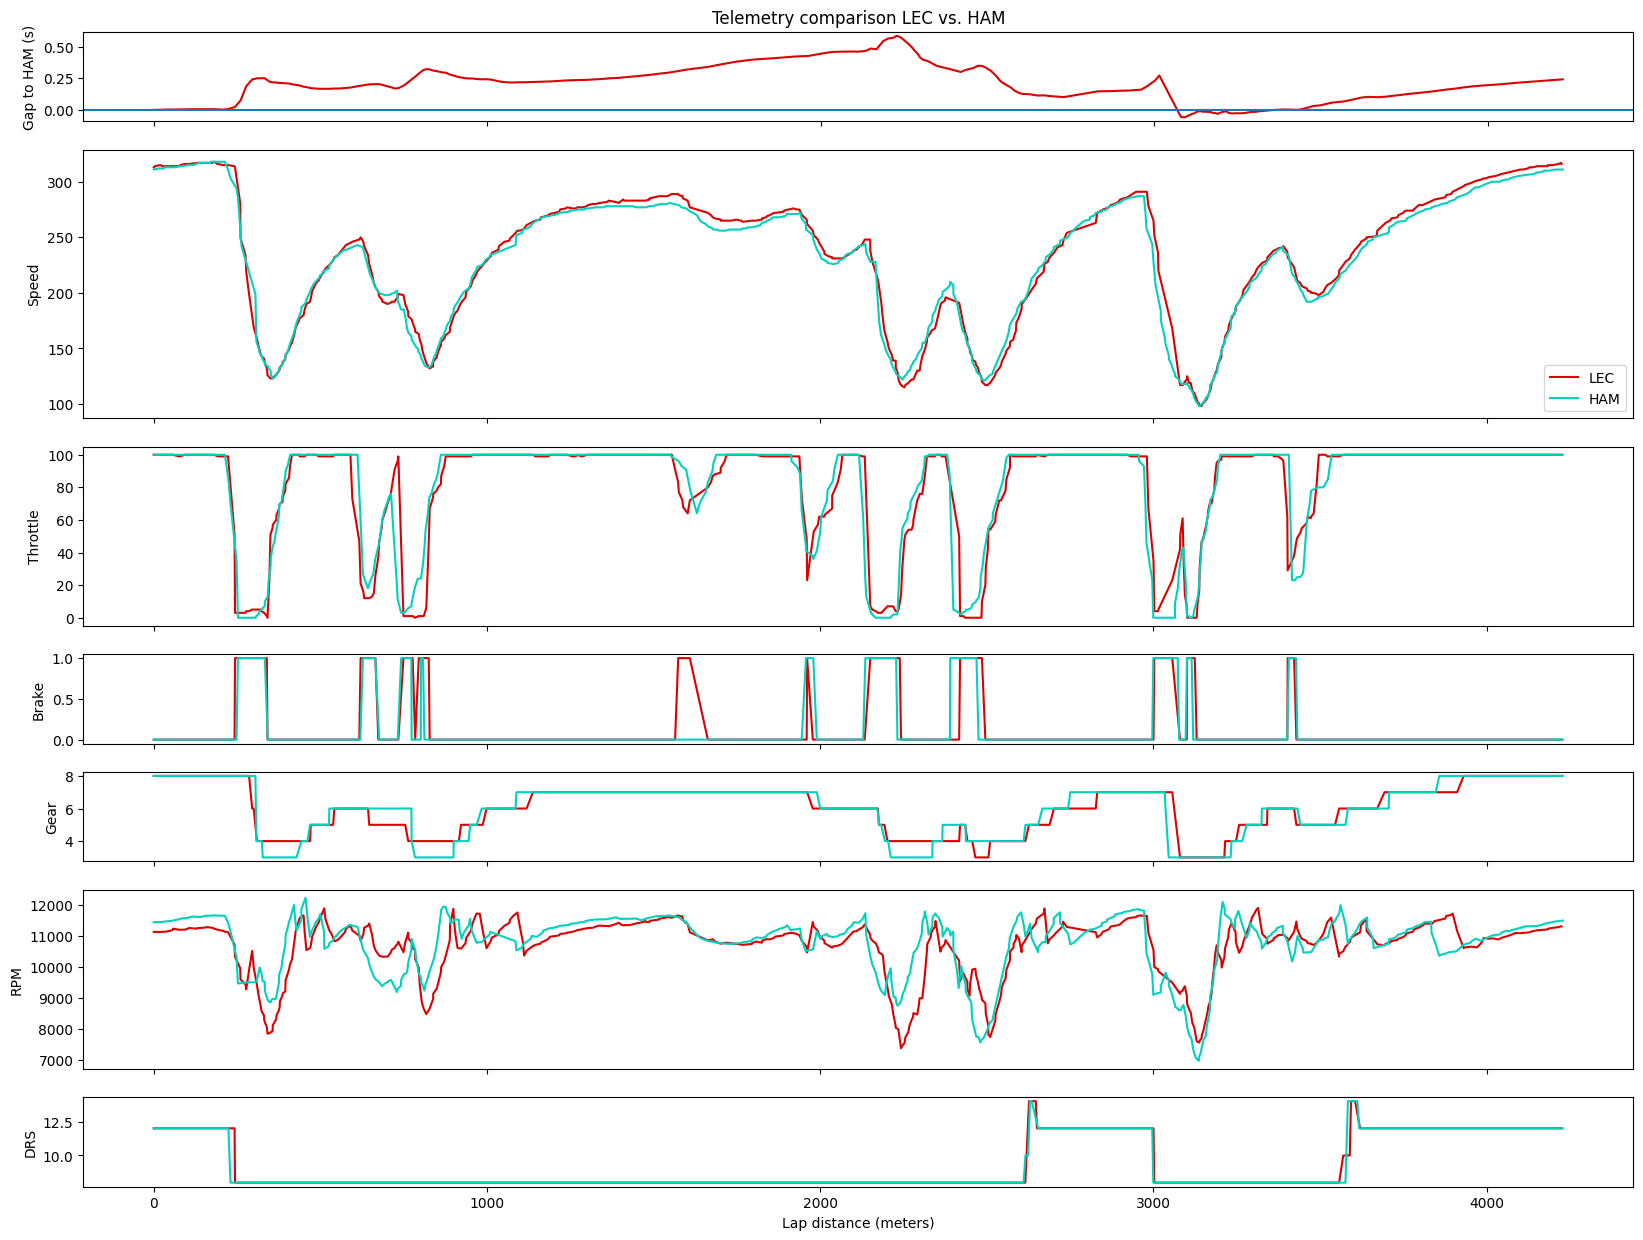

In [13]:
# Set the size of the plot
plt.rcParams['figure.figsize'] = [20, 15]

# plot consists of 7 subplots:
#     - Delta (gap to the other driver)
#     - Speed
#     - Throttle
#     - Braking
#     - Gear
#     - RPM
#     - DRS
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': [1, 3, 2, 1, 1, 2, 1]})

# Set the title of the plot
ax[0].title.set_text(f"Telemetry comparison {driver_1} vs. {driver_2}")

# Subplot 1: The delta
ax[0].plot(ref_tel['Distance'], delta_time, color=color_1)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Subplot 2: Distance
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=color_1)
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=color_2)
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Subplot 3: Throttle
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=color_1)
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=color_2)
ax[2].set(ylabel='Throttle')

# Subplot 4: Brake
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=color_1)
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=color_2)
ax[3].set(ylabel='Brake')

# Subplot 5: Gear
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=color_1)
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=color_2)
ax[4].set(ylabel='Gear')

# Subplot 6: RPM
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=color_1)
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=color_2)
ax[5].set(ylabel='RPM')

# Subplot 7: DRS
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=color_1)
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=color_2)
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

### Minisector comparison

In [14]:
# Merge the telemetry from both drivers into one dataframe
telemetry_driver_1['Driver'] = driver_1
telemetry_driver_2['Driver'] = driver_2

telemetry = pd.concat([telemetry_driver_1, telemetry_driver_2])

In [15]:
# Calculate minisectors
num_minisectors = 25
total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors

minisectors = [0]

for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

# Assign a minisector number to every row in the telemetry dataframe
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [16]:
# Calculate minisector speeds per driver
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

# Per minisector, find the fastest driver
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

# Merge the fastest_driver dataframe to the telemetry dataframe on minisector
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])

# Since our plot can only work with integers, we need to convert the driver abbreviations to integers (1 or 2)
telemetry.loc[telemetry['Fastest_driver'] == driver_1, 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == driver_2, 'Fastest_driver_int'] = 2

In [17]:
# Get the x and y coordinates
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

# Convert the coordinates to points, and then concat them into segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

In [18]:
# The segments we just created can now be colored according to the fastest driver in a minisector
cmap = ListedColormap([color_1, color_2])
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

ValueError: ignored

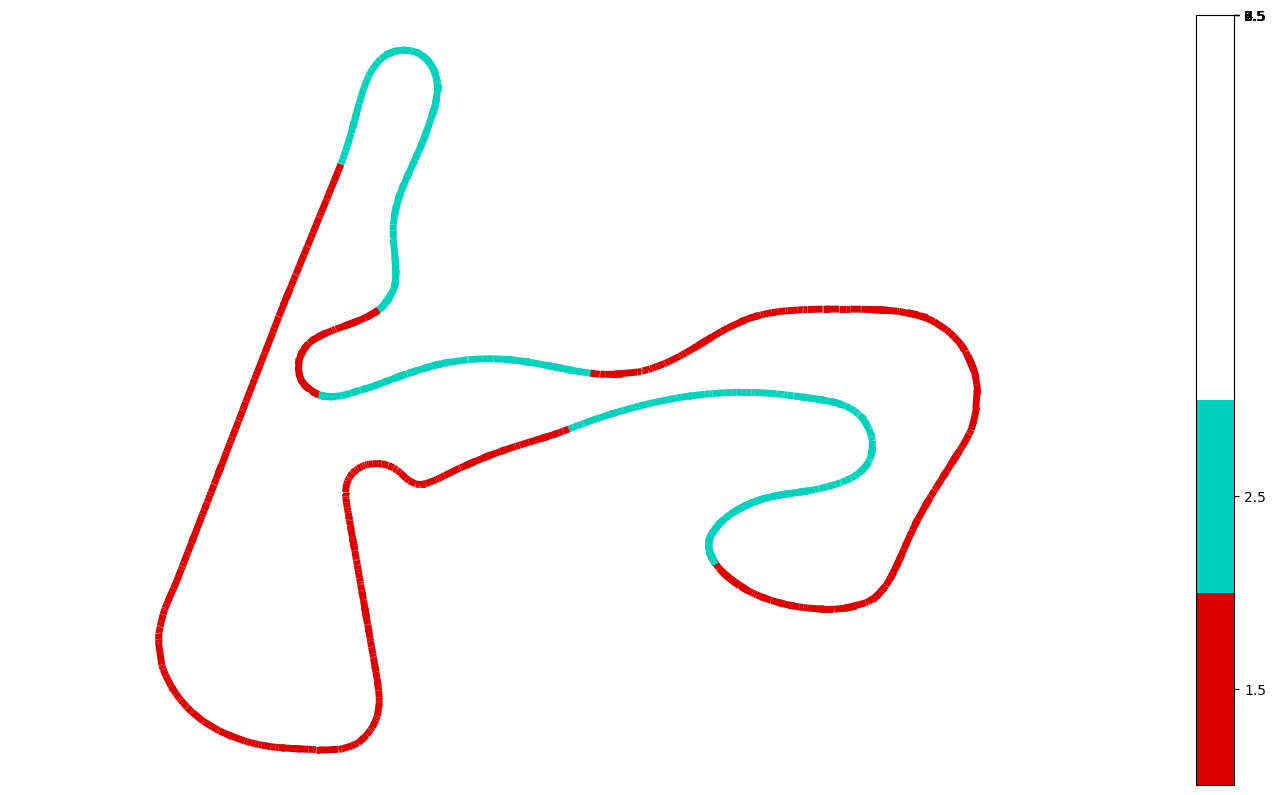

In [19]:
# Create the plot
plt.rcParams['figure.figsize'] = [18, 10]

# Plot the line collection and style the plot
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.box(False)
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Add a colorbar for as legend
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels([driver_1, driver_2])